In [50]:
import numpy as np

def pi(theta, sigma1=3.0):
    theta = np.asarray(theta, dtype=float)
    return np.exp(-0.5 * (theta[0] / sigma1) ** 2
                  - 0.5 * (theta[1] ** 2) / np.exp(theta[0])
                  - 0.5 * theta[0])


In [51]:
theta = np.array([0.0, 0.0])
w = 0.5
T = 10000
samples = [theta.copy()]


In [52]:
def slice_sampling():
    global theta, samples
    samples = [theta.copy()]
    for _ in range(T):
        y = np.random.uniform(0.0, pi(theta))
        u = np.random.uniform(0.0, 1.0)
        L = theta - w * u
        R = L + w
        while pi(L) > y:
            L = L - w
        while pi(R) > y:
            R = R + w
        while True:
            new_theta = np.random.uniform(L, R)
            if pi(new_theta) >= y:
                theta = np.asarray(new_theta, dtype=float)
                samples.append(theta.copy())
                break
            else:
                mask = new_theta < theta
                L = np.where(mask, new_theta, L)
                R = np.where(~mask, new_theta, R)
    return samples


In [53]:
samples = slice_sampling()
samples = np.asarray(samples)
burn_in = min(200, len(samples) // 2)
chain = samples[burn_in:] if burn_in < len(samples) else samples


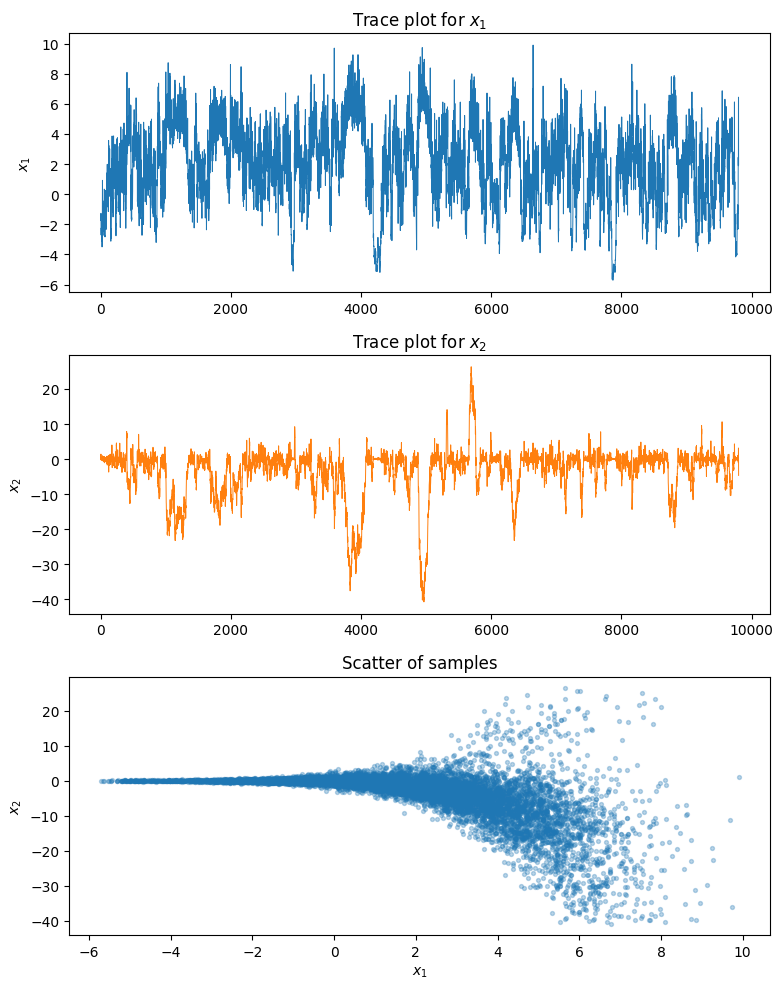

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=False)

axs[0].plot(chain[:, 0], color='tab:blue', linewidth=0.7)
axs[0].set_ylabel(r"$x_1$")
axs[0].set_title("Trace plot for $x_1$")

axs[1].plot(chain[:, 1], color='tab:orange', linewidth=0.7)
axs[1].set_ylabel(r"$x_2$")
axs[1].set_title("Trace plot for $x_2$")

axs[2].scatter(chain[:, 0], chain[:, 1], s=8, alpha=0.3)
axs[2].set_xlabel(r"$x_1$")
axs[2].set_ylabel(r"$x_2$")
axs[2].set_title("Scatter of samples")

plt.tight_layout()
plt.show()
